## Инвестиционный проект: открытие кафе

Описание проекта: открытие кафе с роботами-официантами.

Цель проекта: определить условия работы кафе, которые позволят ему оставаться популярным после того, как интерес к роботам у посетителей пройдет.

Задачи проекта: 
1. исследование рынка предприятий общественного питания Москвы:
1.1. определение типа заведения;
1.2. определение оптимального количества посадочных мест;
1.3. определение места размещения.
2. выработка рекомендаций.

### План проекта

1.	Загрузка и анализ данных 
2.	Предобработка данных 
3.	Анализ информации 
4.	Выводы 
5.  Презентация

### 1. Загрузка и анализ данных

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.info()
rest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [60]:
print(rest_data.duplicated().sum())# проверка на дубли

0


Выводы
Данные загружены. Выведена информация о данных. Выведены первые 5 значений переменных. В данных нет пропусков, об этом свидетельствует количество значений в переменных. В данных нет дубликатов (выполнена проверка). Переменная id нуждается в изменении типа: из int в object, т.к. id - в данном случае отражает не числовую характеристику, а качественную.  

### 2. Предобработка данных

In [61]:
rest_data['id'] = rest_data['id'].astype(object)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null object
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(1), object(5)
memory usage: 720.4+ KB


Меняем тип данных переменной id из int в object. Проверяем.

In [62]:
rest_data['object_type'] = rest_data['object_type'].replace('предприятие быстрого обслуживания', 'fast food')
rest_data['object_type'] = rest_data['object_type'].replace('магазин (отдел кулинарии)', 'магазин')
rest_data.sample(10)

,id,object_name,chain,object_type,address,number
12007,189526,Кофе с собой,да,fast food,"город Москва, Зеленодольская улица, дом 35",2
53,21998,Му-Му,да,кафе,"город Москва, улица Арбат, дом 45/24",220
2486,73434,Предприятие быстрого обслуживания «РусЪпай»,нет,fast food,"город Москва, Варшавское шоссе, дом 125, корпус 3",0
6846,26913,КОЛБАСОФФ,да,ресторан,"город Москва, Щукинская улица, дом 42",150
2503,29046,ГБОУ СОШ 879,нет,столовая,"город Москва, Кировоградская улица, дом 30А",300
14776,209567,Шантри,нет,ресторан,"город Москва, Цветной бульвар, дом 30, строение 1",250
642,153381,Столовая при ГБОУ Школа 57,нет,столовая,"город Москва, Малый Знаменский переулок, дом 7...",36
167,149149,Суши WoK,да,кафе,"город Москва, проспект Вернадского, дом 11/19",8
5407,23117,Кафе,нет,кафе,"город Москва, проспект Мира, дом 211, корпус 2",20
14052,221182,Донер,нет,закусочная,"город Москва, улица Новый Арбат, дом 17",2


В целях оптимизации построения графиков заменим значения переменной object_type "предприятие быстрого обслуживания" и "магазин (отдел кулинарии)" более короткими аналогами. Проверяем.

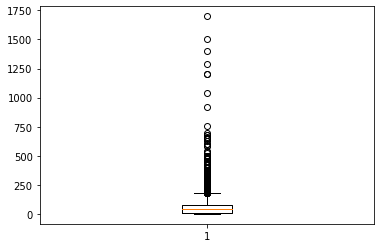

In [63]:
box_area=plt.boxplot(rest_data['number'])# определяем аномальные значения

In [64]:
rest_data = rest_data[rest_data.number <= 1000] # отбрасываем аномальные значения
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15359 entries, 0 to 15365
Data columns (total 6 columns):
id             15359 non-null object
object_name    15359 non-null object
chain          15359 non-null object
object_type    15359 non-null object
address        15359 non-null object
number         15359 non-null int64
dtypes: int64(1), object(5)
memory usage: 839.9+ KB


Построим диаграмму размаха по переменной number (количество посадочных мест). 
Если залы до 1000 человек еще можно представить, то свыше 1000 - с трудом. Отбрасываем объекты с количеством посадочных мест свыше 1000. Таких оказалось всего 7.

### 3. Анализ информации

#### Распределение видов объектов общественного питания по количеству заведений

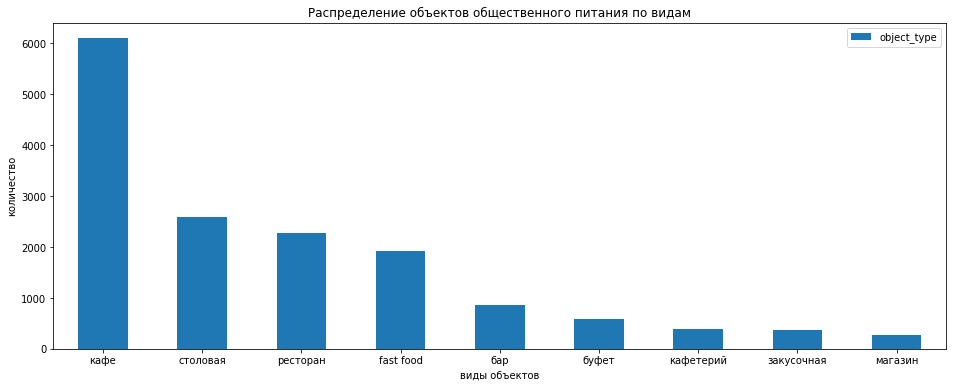

In [65]:
obj_type = rest_data['object_type'].value_counts().reset_index()
obj_type.plot.bar(figsize = (16, 6), title = 'Распределение объектов общественного питания по видам', x = 'index')
plt.xticks(rotation=0)
plt.xlabel("виды объектов")
plt.ylabel("количество");

Построим распределение объектов опщепита по видам объектов. Построим график. Как видно, наиболее распространенные объекты - это кафе, столовые, рестораны и предприятия быстрого питания. 

#### Распределение сетевых и несетевых заведений по количеству

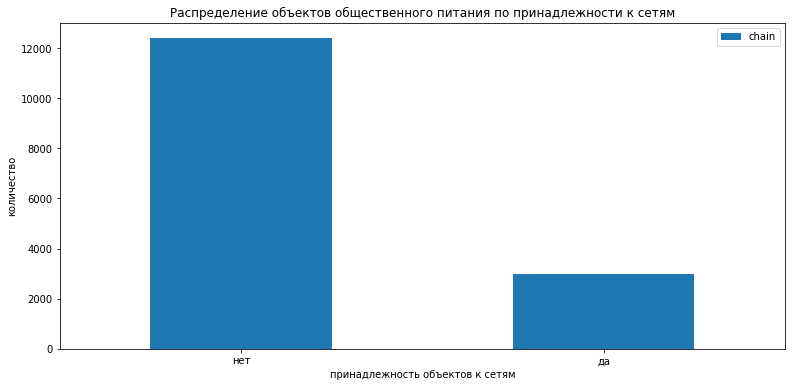

In [66]:
chain_type = rest_data['chain'].value_counts().reset_index()
chain_type.plot.bar(figsize = (13, 6), title = 'Распределение объектов общественного питания по принадлежности к сетям', x = 'index')
plt.xticks(rotation=0)
plt.xlabel("принадлежность объектов к сетям")
plt.ylabel("количество");

Построим распределение объектов опщепита по принадлежности к сетям. Построим график. Как видно, подавляющее большинство заведений общепита не принадлежит к сетевым организациям. 

#### Расчет доли сетевых объектов общественного питания в общем количестве заведений по видам.

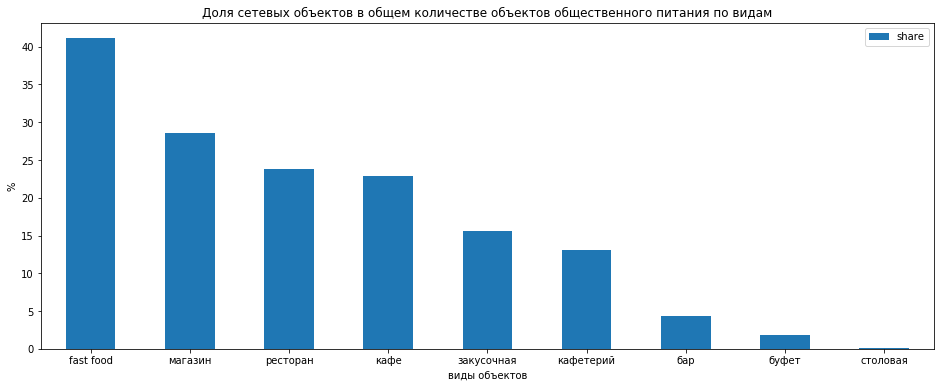

In [72]:
chain_obj = rest_data.query('chain =="да"')
chain_obj_type = chain_obj['object_type'].value_counts().reset_index()
chain_obj_type.columns = ['types', 'chain_obj']
obj_type.columns = ['types', 'object_type']
share_chain_obj = chain_obj_type.merge(obj_type, on=['types'])
share_chain_obj['share']= share_chain_obj['chain_obj']/share_chain_obj['object_type']*100
share_chain_obj=share_chain_obj.sort_values(by = 'share', ascending = False)
share_chain_obj.plot.bar(figsize = (16, 6), title = 'Доля сетевых объектов в общем количестве объектов общественного питания по видам', x = 'types', y='share');
plt.xticks(rotation=0)
plt.xlabel("виды объектов")
plt.ylabel("%");

Рассчитаем долю сетевых объектов в общем количестве объектов опщепита по видам. Построим график. Как видно из графика, наиболее значительная доля сетевых организаций наблюдается у предприятий быстрого питания, магазинов и ресторанов. Кафе по данному показателю находятся на 4 месте.

#### Распределение сетевых заведений по количеству посадочных мест

[array([15.,  0.]), array([ 72., 157.])]


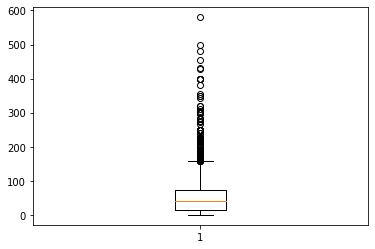

In [73]:
box_area=plt.boxplot(chain_obj['number'])# строим диаграмму размаха
print([item.get_ydata() for item in box_area['whiskers']]) # определяем концы усов в диаграмме размаха

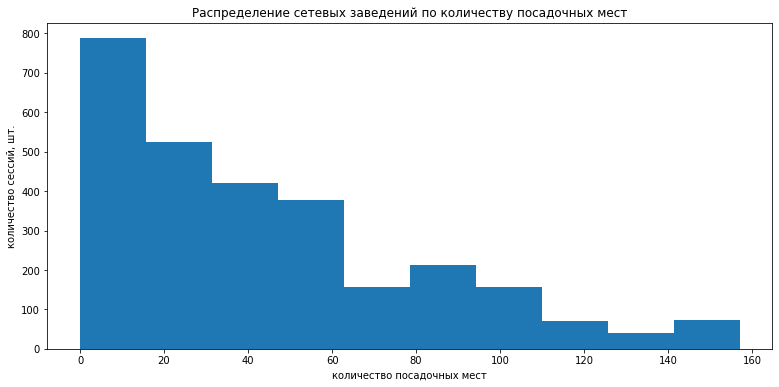

In [74]:
chain_obj_2 = chain_obj[chain_obj['number']<= 157]# отбрасываем выбросы
chain_obj_2['number'].plot.hist(bins=10, figsize = (13, 6), title = 'Распределение сетевых заведений по количеству посадочных мест');
plt.xlabel("количество посадочных мест")
plt.ylabel("количество сессий, шт.");

Построим диаграмму размаха распределения сетевых заведений по количеству посадочных мест. Свыше 157 мест начинаются выбросы. Исключаем их.
Строим гистограмму распределения сетевых заведений по количеству посадочных мест. Из получившегося графика видно, что большинство сетевых предприятий общепита имеют небольшое количество посадочных мест (до 70). Большое количество мест имеют очень мало сетевых заведений. 
Такое распределение, скорее всего, обусловлено ограниченными возможностями владельцев при открытии новых точек общепита. Возможно, часть сетевых заведений являются франшизами, когда материнская компания предоставляет только марку сети, а все расходы несет предприниматель, открывающий заведение.

#### Расчет медианного количества посадочных мест по видам заведений 

  object_type  number
8    столовая     103
7    ресторан      80
1         бар      35
2       буфет      32
4        кафе      30
5   кафетерий       6
0   fast food       5
3  закусочная       0
6     магазин       0


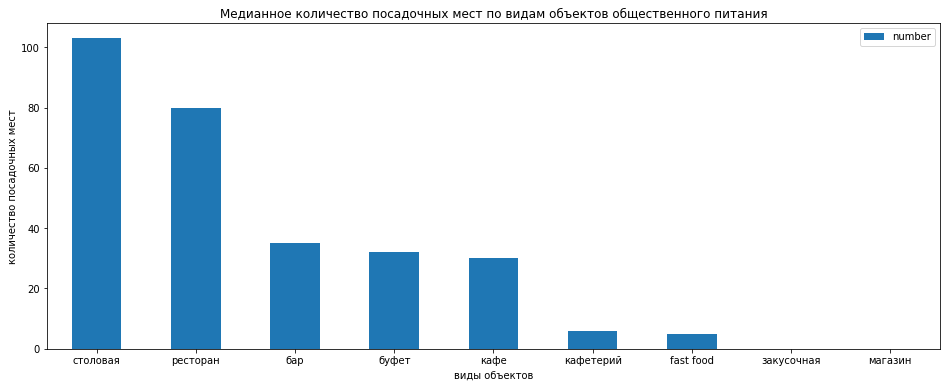

In [75]:
median_seats_obj = rest_data.groupby('object_type')['number'].median().reset_index().sort_values(by='number', ascending = False)
print(median_seats_obj)
median_seats_obj.plot.bar(figsize = (16, 6), title = 'Медианное количество посадочных мест по видам объектов общественного питания', x = 'object_type')
plt.xticks(rotation=0)
plt.xlabel("виды объектов")
plt.ylabel("количество посадочных мест");

Рассчитаем медианное количество посадочных мест по видам объектов общепита. Построим график.
Исходя из графика, в среднем самое большое количество мест предоставляют столовые (103), на втором месте рестораны (80), на третьем - бары (35), на четвертом - буфеты (32), на пятом - кафе (30). Минимальное количество мест у кафетериев (6) и фаст-фудов (5). У кулинарий магазинов и закусочных посадочных мест нет.

#### Выделение столбца "Улица" из адреса

In [76]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'аллея','бульвар','набережная','тупик','линия','город Зеленоград',
         'квартал','село','деревня','микрорайон','посёлок','километр', 'территория','поселение','просек']
str_pat = r'.*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+'.format('|'.join(words))
str_pat_2 = r'\s*\b([^,]*?(?:{})\b[^,]*)[,$]+'.format('|'.join(words))
rest_data['streets'] = rest_data['address'].str.extract(str_pat).fillna(rest_data['address'].str.extract(str_pat_2)) 
rest_data.sample(10)                                                       

,id,object_name,chain,object_type,address,number,streets
9478,163951,Лобби- бар,нет,бар,"город Москва, Ленинский проспект, дом 158",60,Ленинский проспект
12839,204001,Кафе,нет,кафе,"город Москва, Тихорецкий бульвар, владение 1, ...",25,Тихорецкий бульвар
6137,28523,СТОЛОВАЯ,нет,столовая,"город Москва, улица Вавилова, дом 47А",40,улица Вавилова
8222,144241,Калина бар,нет,бар,"город Москва, Новинский бульвар, дом 8",150,Новинский бульвар
7495,136964,Кафе «Кофе Хаус»,да,кафе,"город Москва, Каширское шоссе, дом 61, корпус 3А",75,Каширское шоссе
3127,90766,Кафе,нет,кафе,"город Москва, проезд Досфлота, дом 2, строение 1",24,проезд Досфлота
3961,27508,ДОГОТОВОЧНАЯ СТОЛОВАЯ - ШКОЛА 1024,нет,столовая,"город Москва, Новокосинская улица, дом 41",240,Новокосинская улица
1757,20058,Мериталь,нет,кафе,"город Москва, улица Соловьиная Роща, дом 11",40,улица Соловьиная Роща
10609,175938,Гастробар,нет,ресторан,"город Москва, улица Столетова, дом 19",30,улица Столетова
7173,127279,Сытая Утка,да,ресторан,"город Москва, Дмитровское шоссе, дом 89",55,Дмитровское шоссе


In [77]:
rest_data.loc[rest_data.loc[:,'streets'].isna()]

,id,object_name,chain,object_type,address,number,streets


Выделим улицы (и прочие топонимы) в отдельный столбец. Проверяем на незаполненные значения.

#### График топ-10 улиц по количеству объектов общественного питания. Определение районов Москвы, где находятся эти улицы

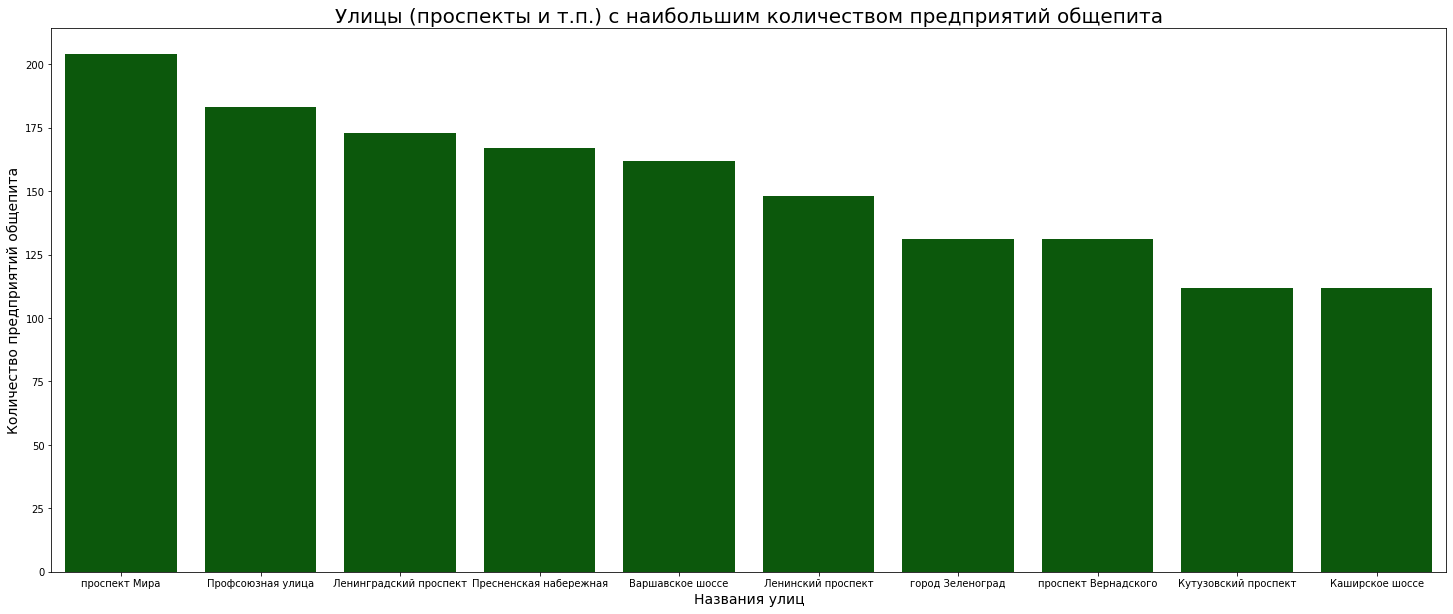

In [78]:
streets_quant = rest_data['streets'].value_counts().reset_index()
streets_quant.columns = ['streets', 'quant']
top_streets = streets_quant.head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x="streets", y="quant", data=top_streets, color='#006400');
plt.title('Улицы (проспекты и т.п.) с наибольшим количеством предприятий общепита', fontsize = 20)
plt.xlabel('Названия улиц', fontsize = 14)
plt.ylabel('Количество предприятий общепита', fontsize = 14);

In [79]:
from io import BytesIO
import requests
spreadsheet_id = '1KVAEnLPqrMg0Ibm7SvsaObIiK7dKFT1qb8NlVYdknG0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
reg_street = pd.read_excel(BytesIO(r.content),sheet_name='sheet1')
reg_street.head()

,streets,district
0,1-й Ирининский переулок,Басманный район
1,2-й Ирининский переулок,Басманный район
2,3-й Ирининский переулок,Басманный район
3,Иркутская улица,район Гольяново
4,1-й Иртышский проезд,район Гольяново


In [80]:
top_streets = top_streets.merge(reg_street, on =['streets'], how='left')
top_streets

,streets,quant,district
0,проспект Мира,204,Мещанский район
1,проспект Мира,204,Алексеевский район
2,проспект Мира,204,район Марьина Роща
3,проспект Мира,204,Останкинский район
4,проспект Мира,204,район Ростокино
5,проспект Мира,204,район Свиблово
6,проспект Мира,204,Ярославский район
7,Профсоюзная улица,183,Академический район
8,Профсоюзная улица,183,район Коньково
9,Профсоюзная улица,183,Обручевский район


Рассчитаем данные по 10 улицам (проспектам, шоссе и т.д.) с наибольшим количеством заведений общепита. 
Для определения принадлежности улицы к району загрузим базу улиц и районов Москвы. Объединим таблицы.
Как видно, из получившейся таблицы большинство улиц с наибольшим количеством предприятий общепита проходят через несколько районов, т.к., как правило, это основные магистрали города, соединяющие центр со спальными районами, и расположение на них кафе, ресторанов и пр. обусловлено высокой проходимостью и густонаселенностью указанных улиц.
Отдельно следует отметить г. Зеленоград, где улиц нет.

#### Определение количества улиц с одним объектом общественного питания. Определение районов Москвы, где находятся эти улицы

In [81]:
streets_one = streets_quant.query('quant == 1')# определяем улицы с 1 объектом общепита
streets_one

,streets,quant
1399,Балтийская улица,1
1400,улица Генерала Ермолова,1
1401,3-й Кадашёвский переулок,1
1402,Пулковская улица,1
1403,Научный проезд,1
...,...,...
1990,1-й Сетуньский проезд,1
1991,Банный проезд,1
1992,Малый Коптевский проезд,1
1993,Гранатный переулок,1


In [82]:
streets_one_distr1 = streets_one.merge(reg_street, on =['streets'], how='left')# присоединяем к таблице улиц данные по районам
streets_one_distr1.count()

streets     713
quant       713
district    674
dtype: int64

In [83]:
streets_oned = streets_one.merge(rest_data, on =['streets'], how='left')# присоединяем к таблице улиц полные адреса
streets_oned

,streets,quant,id,object_name,chain,object_type,address,number
0,Балтийская улица,1,146421,Рамн,нет,кафе,"город Москва, Балтийская улица, дом 10, корпус 2",26
1,улица Генерала Ермолова,1,68203,Ньокки,да,ресторан,"город Москва, улица Генерала Ермолова, дом 4",60
2,3-й Кадашёвский переулок,1,21728,Кофе Он,нет,кафе,"город Москва, 3-й Кадашёвский переулок, дом 2",72
3,Пулковская улица,1,29188,Столовая,нет,столовая,"город Москва, Пулковская улица, дом 6",50
4,Научный проезд,1,24627,Кантина кафе Офис клуб,нет,кафе,"город Москва, Научный проезд, дом 19",200
...,...,...,...,...,...,...,...,...
591,1-й Сетуньский проезд,1,141385,Гранатовый сад,нет,ресторан,"город Москва, 1-й Сетуньский проезд, дом 10",80
592,Банный проезд,1,21069,Буфет при Ржевской бане,нет,буфет,"город Москва, Банный проезд, дом 3, строение 1",4
593,Малый Коптевский проезд,1,82615,Столовая школы № 1847,нет,столовая,"город Москва, Малый Коптевский проезд, дом 3",35
594,Гранатный переулок,1,26414,Ресторан «Архитектор»,нет,кафе,"город Москва, Гранатный переулок, дом 7, строе...",100


In [84]:
from io import BytesIO
import requests
spreadsheet_id = '1KVAEnLPqrMg0Ibm7SvsaObIiK7dKFT1qb8NlVYdknG0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
data_adr = pd.read_excel(BytesIO(r.content),sheet_name='sheet0')# загружаем данные с полными адресами и районами
data_adr.head()

,address,district
0,"город Москва, Варшавское шоссе, дом 150, строе...",Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",Вешняки
2,"город Москва, Гороховский переулок, дом 21",Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",Сокол


In [85]:
streets_one_distr2 = streets_oned.merge(data_adr, on =['address'], how='left')
streets_one_distr2

,streets,quant,id,object_name,chain,object_type,address,number,district
0,Балтийская улица,1,146421,Рамн,нет,кафе,"город Москва, Балтийская улица, дом 10, корпус 2",26,Аэропорт
1,улица Генерала Ермолова,1,68203,Ньокки,да,ресторан,"город Москва, улица Генерала Ермолова, дом 4",60,Дорогомилово
2,3-й Кадашёвский переулок,1,21728,Кофе Он,нет,кафе,"город Москва, 3-й Кадашёвский переулок, дом 2",72,Якиманка
3,Пулковская улица,1,29188,Столовая,нет,столовая,"город Москва, Пулковская улица, дом 6",50,Головинский
4,Научный проезд,1,24627,Кантина кафе Офис клуб,нет,кафе,"город Москва, Научный проезд, дом 19",200,Черемушки
...,...,...,...,...,...,...,...,...,...
591,1-й Сетуньский проезд,1,141385,Гранатовый сад,нет,ресторан,"город Москва, 1-й Сетуньский проезд, дом 10",80,Раменки
592,Банный проезд,1,21069,Буфет при Ржевской бане,нет,буфет,"город Москва, Банный проезд, дом 3, строение 1",4,Мещанский
593,Малый Коптевский проезд,1,82615,Столовая школы № 1847,нет,столовая,"город Москва, Малый Коптевский проезд, дом 3",35,Аэропорт
594,Гранатный переулок,1,26414,Ресторан «Архитектор»,нет,кафе,"город Москва, Гранатный переулок, дом 7, строе...",100,Пресненский


In [86]:
streets_one_distr2['district'].value_counts().head(10)

Хамовники         26
Таганский         26
Басманный         22
Тверской          20
Пресненский       19
Марьина Роща      17
Сокольники        14
Соколиная Гора    12
Лефортово         12
Замоскворечье     12
Name: district, dtype: int64

Определим улицы с одним объектом общепита. Присоединяем к таблице с улицами данные по районам. Посчитаем количество районов.
Как видно, количество районов получилось больше количества улиц, т.е. некоторые улицы проходят по нескольким районам.
Подгружаем к таблице с улицами (с 1 объектом общепита) полные адреса. Загружаем базу адресов Москвы с районами. 
Присоединяем к таблице с улицами данные по районам. Проверяем.
Выделим первые 10 районоав по количеству заведений общепита, единственных на своей улице.
Как видно, указанные районы относятся к центру Москвы, что обусловлено большим количеством маленьких улочек, находящихся в центре города. Два кафе на такой улице - избыток.

#### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

[array([15.,  0.]), array([ 80., 176.])]


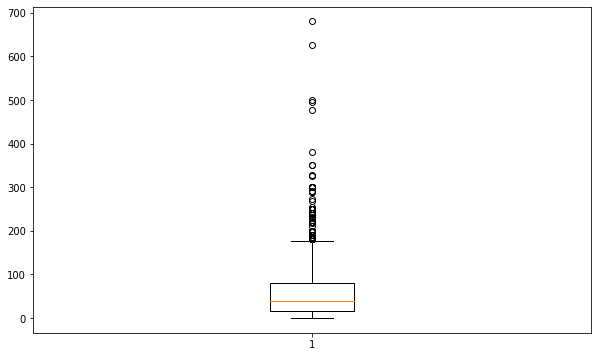

In [87]:
top_streets_name = top_streets['streets'].unique()
top_streets_number = rest_data.query('streets in @top_streets_name')
plt.figure(figsize=(10, 6))
box_area=plt.boxplot(top_streets_number['number'])# строим диаграмму размаха
print([item.get_ydata() for item in box_area['whiskers']]) # определяем концы усов в диаграмме размаха
#sns.distplot(top_streets_number['number'])

[array([12.,  0.]), array([ 80., 181.])]


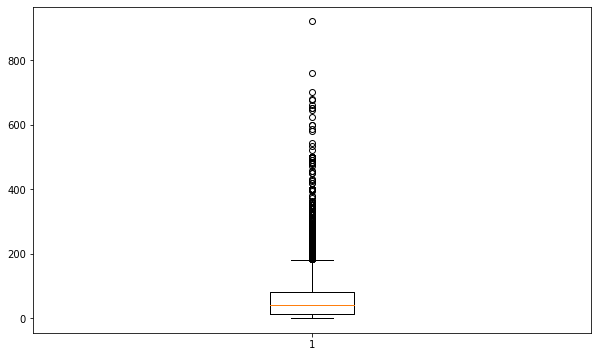

In [91]:
plt.figure(figsize=(10, 6))
box_area=plt.boxplot(rest_data['number'])# строим диаграмму размаха для общего датасета
print([item.get_ydata() for item in box_area['whiskers']]) # определяем концы усов в диаграмме размаха

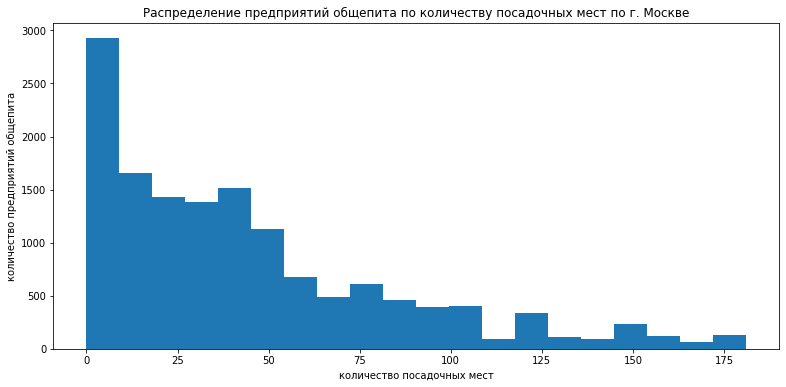

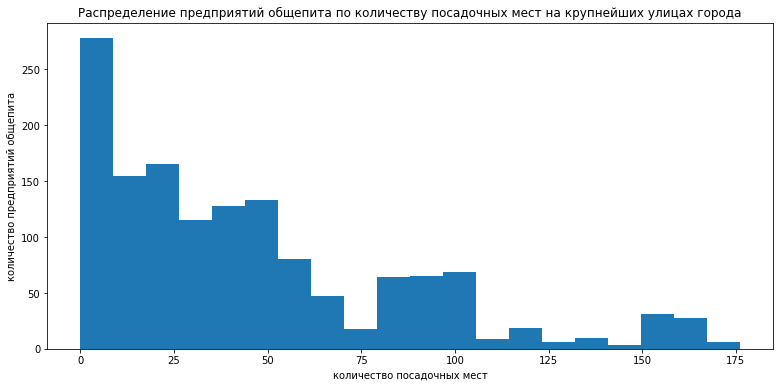

In [113]:
top_streets_number = top_streets_number[top_streets_number['number']<= 176]# отбрасываем выбросы
rest_data_number = rest_data[rest_data['number']<=181]
rest_data_number['number'].plot.hist(bins=20, figsize = (13, 6), title = 'Распределение предприятий общепита по количеству посадочных мест по г. Москве');
plt.xlabel('количество посадочных мест',)
plt.ylabel('количество предприятий общепита');
plt.figure(figsize=(10, 6))
top_streets_number['number'].plot.hist(bins=20, figsize = (13, 6), title = 'Распределение предприятий общепита по количеству посадочных мест на крупнейших улицах города');
plt.xlabel('количество посадочных мест',)
plt.ylabel('количество предприятий общепита');

Построим распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.
Исходя из полученного распределения можно увидеть 3 основных группы предприятий общепита по количеству посадочных мест.
1 группа - предприятия с количеством мест до 75. Это самая большая группа, т.к. открытие таких заведений требует гораздо меньше вложений, чем открытие предприятий из следующих 2-х групп.
2 группа - предприятия с количеством мест от 75 до 130. Вторая по величине группа.
3 группа - предприятия с количеством мест свыше 130.

Сравним распределение посадочных мест по предприятиям общепита Москвы и по предприятиям общепита, расположенным на улицах Москвы с наибольшим количеством заведений общественного питания.
Как видно из графиков, для предприятий общепита Москвы характерно скошенное нормальное распределение (совокупность не разбита на группы, распределение, в целом, едино).
Для предприятий общепита крупнейших улиц характерна модель смеси трех нормальных распределений (на графике явно выделены однородные группы).
Указанная ситуация может быть обусловлена тем, что в целом по городу переход между предприятиями общетвенного питания более плавный вследствии их многочисленности и разнообразия потребностей населения, на крупнейших улицах каждое предприятие общепита вынуждено занять определенную нишу, иначе будет терпеть убытки.

### 4. Выводы

1. Наиболее популярным типом заведения общепита в Москве является кафе.
2. Большинство предприятий общепита в Москве не являются сетевыми.
3. Наиболее распространенное количество посадочных мест в предприятиях питания в Москве - до 60; для улиц с большим количеством объектов общественного питания - до 75. Среднее количество посадочных мест для кафе - 40.
4. Большинство улиц с наибольшим количеством предприятий общепита проходят через несколько районов, т.к., как правило, это основные магистрали города, соединяющие центр со спальными районами, и расположение на них кафе, ресторанов и пр. обусловлено высокой проходимостью и густонаселенностью указанных улиц. 
5. Большинство улиц с 1 объектом общепита относится к центру Москвы, что обусловлено большим количеством маленьких улочек, находящихся в центре города.
6. В Москве высокая конкуренция между предприятиями общественного питания.


Рекомендации по открытию заведения общепита:

1. Вид заведения: кафе. Причины: проект подразумевает наличие роботов-официантов. Из представленных видов заведений официанты могут работать в кафе, ресторанах и барах. Рестораны отпадают из-за слишком большого меню (роботы должны хорошо распознать заказ, в условиях длинного меню с этим могут быть проблемы) и большого количества посадочных мест. Бары также отпадают в связи с возможным неадекватным поведением нетрезвых посетителей в отношении роботов. Остается кафе.
2. Количество посадочных мест: от 40 до 60. Причины: а) учитывая, что проект - пилотный и несет в себе риски не окупиться, необходимо ограничить размер возможных потерь. 40-60 посадочных мест - это 10-15 столиков. Т.е. будет достаточно 2-4 роботов-официантов. На первом этапе можно открыть кафе с 40 посадочными местами с перспективой расширения до 60 в случае успешности проекта. Большое количество посадочных мест вызовет необходимость приобретения большего количества роботов. Соответственно, возможные потери, в случае провала проекта, возрастут; б) расчеты указывают на то, что среднее количество посадочных мест в кафе Москвы составляет 40, т.е. 40 посадочных мест для кафе - это проверенный успешный вариант.
3. Кафе целесообразно расположить на одной из крупных магистралей Москвы, связывающих центр со спальными районами. Крупная транспортная артерия обеспечит высокую проходимость рядом с кафе, т.е. большее количество потенциальных посетителей. Также рядом с этими магистралями расположены густонаселенные районы.
4. В случае успешности проекта целесообразно открыть сеть подобных заведений в Москве. Заведения должны соответствовать вышеприведенным рекомендациям: тип - кафе, количество посадочных мест - от 40 до 60, расположение - основные транспортные магистрали Москвы, либо небольшие улицы в центральных районах. 
5. Скорее всего, появление кафе с роботами-официантами вызовет широкий резонанс. СМИ сами расскажут об этом феномене, что позволит снизить затраты на рекламу. Первое время можно прогнозировать высокий интерес общества к роботам, однако со временем он будет снижаться. Важно к этому моменту наработать репутацию и постоянных клиентов, чтобы вместе с интересом не ушла и прибыль. В дальнейшем можно открыть сеть кафе в крупных городах, где также такое заведение может вызвать большой интерес.
6. Необходимость приобретения роботов обусловит высокие затраты на старте проекта, но в долгосрочной перспективе приведет к экономии, т.к. не будет необходимости платить зарплату части персонала и делать отчисления во внебюджетные фонды. Появятся затраты на обслуживание и охрану роботов, но они будут гораздо меньше возможного ФОТа людей-официантов.
Указанные обстоятельства могут способствовать успешной ценовой конкуренции с другими кафе в районе.

#### 5. Презентация: https://yadi.sk/i/ylHxa8ezu04qTQ